In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import continuous_probabilistic_methods

In [59]:
def get_lower_and_upper_bounds(series, method = 'iqr', multiplier = 1.5):
    if method == 'iqr':
        iqr_range = series.quantile(.75)-series.quantile(.25)
        lower_bound = series.quantile(.25) - (iqr_range * multiplier)
        upper_bound = series.quantile(.75) + (iqr_range * multiplier)
    elif method == 'std':
        sigma = series.std()
        mu = series.mean()
        lower_bound = mu - (sigma * multiplier)
        upper_bound = mu + (sigma * multiplier)
    return lower_bound,upper_bound

In [68]:
df=pd.read_csv('lemonade.csv')

df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


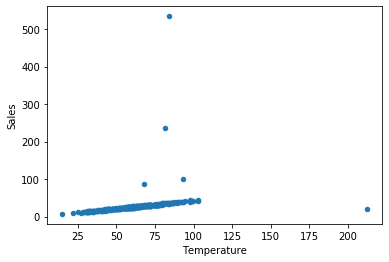

In [9]:
#Visual of lemonade
df.plot.scatter(x='Temperature', y= 'Sales')

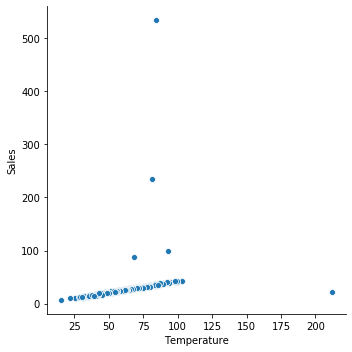

In [11]:
sns.relplot(x='Temperature', y='Sales', data=df)

In [14]:
df_continuous = df[['Temperature', 'Rainfall', 'Flyers', 'Sales']]
df_continuous.std()
zscores = df_continuous.subtract(df_continuous.mean())/df_continuous.std()

In [36]:
def  get_lower_and_upper_bounds2(df, x):
    zscores = pd.Series((x - x.mean()) / x.std())
    # Finds all of the observations within two standard deviations
    two= x[zscores.abs() > 2]
    
    return two

#### 1.

In [37]:
get_lower_and_upper_bounds2(df, df['Temperature'])

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [38]:
df['Temperature'].describe()

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

In [33]:
def get_lower_and_upper_bounds3(df, x):
    zscores = pd.Series((x - x.mean()) / x.std())
    # Finds all of the observations within three standard deviations
    three= x[zscores.abs() > 3]
    
    return three
    

In [35]:
get_lower_and_upper_bounds3(df, df['Temperature'])

41    212.0
Name: Temperature, dtype: float64

In [39]:
get_lower_and_upper_bounds2(df, df['Rainfall'])
get_lower_and_upper_bounds3(df, df['Rainfall'])

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [40]:
df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10


#### 2. 

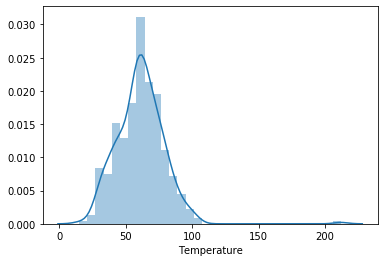

In [44]:
x = df['Temperature']

ax = sns.distplot(x)


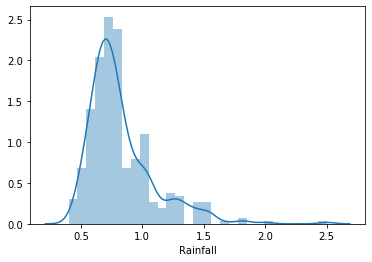

In [43]:
x1=df['Rainfall']
ax1=sns.distplot(x1)

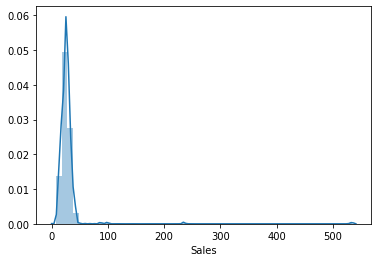

In [45]:
x2=df['Sales']
ax2=sns.distplot(x2)

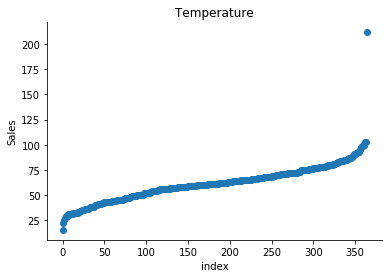

In [51]:
plt.scatter(range(df.shape[0]), np.sort(df['Temperature'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Temperature")
sns.despine()

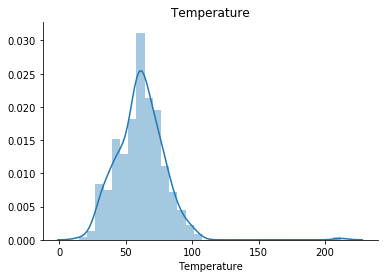

In [52]:
sns.distplot(df['Temperature'])
plt.title("Temperature")
sns.despine()

In [53]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 14.275438
Kurtosis: 230.901088


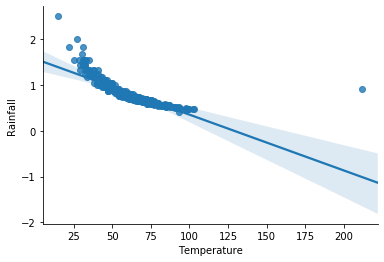

In [54]:
sns.regplot(x="Temperature", y="Rainfall", data=df)
sns.despine();

In [58]:
for col in df.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(df[col])
    print(col)
    print(df[col][(df[col] > upper)], '\n')

TypeError: get_lower_and_upper_bounds() missing 1 required positional argument: 'x'

In [63]:
for col in df.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(df[col], multiplier=3)
    print(col)
    print(df[col][(df[col] > upper)], '\n')

Temperature
41    212.0
Name: Temperature, dtype: float64 

Rainfall
0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64 

Flyers
Series([], Name: Flyers, dtype: int64) 

Price
Series([], Name: Price, dtype: float64) 

Sales
183    235
184    534
185     99
258     87
Name: Sales, dtype: int64 



In [65]:
for col in df.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(df[col], multiplier=3)
    print(col)
    print(df[col][(df[col] < lower)], '\n')

Temperature
Series([], Name: Temperature, dtype: float64) 

Rainfall
Series([], Name: Rainfall, dtype: float64) 

Flyers
324   -38
Name: Flyers, dtype: int64 

Price
Series([], Name: Price, dtype: float64) 

Sales
Series([], Name: Sales, dtype: int64) 



In [66]:
for col in df.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(df[col], multiplier=2)
    print(col)
    print(df[col][(df[col] < lower)], '\n')

Temperature
Series([], Name: Temperature, dtype: float64) 

Rainfall
Series([], Name: Rainfall, dtype: float64) 

Flyers
324   -38
Name: Flyers, dtype: int64 

Price
Series([], Name: Price, dtype: float64) 

Sales
Series([], Name: Sales, dtype: int64) 



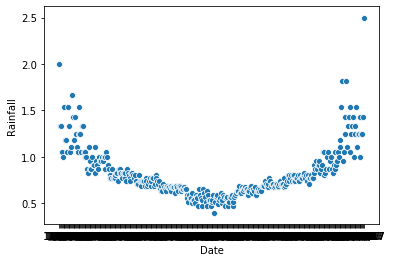

In [69]:
sns.scatterplot(x=df.Date, y=df.Rainfall)

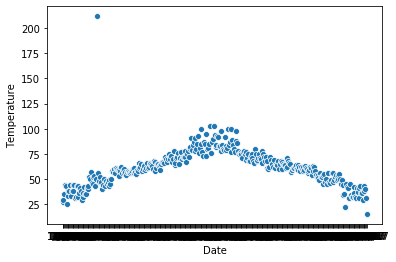

In [70]:
sns.scatterplot(x=df.Date, y=df.Temperature)

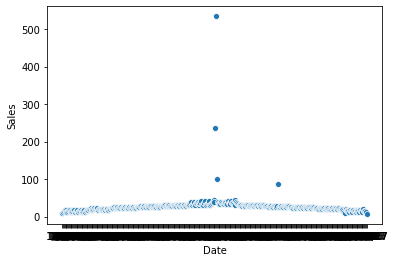

In [71]:
sns.scatterplot(x=df.Date, y=df.Sales)